In [16]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [17]:
def rng(m=2**32, a=1103515245, c=12345):
    rng.current = (a * rng.current + c) % m
    return rng.current / m

# setting the seed
rng.current = 1

###Задача 1 
Реализовать serial test и применить к выборке samples

In [18]:
samples = [rng() for _ in range(1000)]

[ 6. 12.  5.  2.  2.  3.  4.  7.  3.  3.  6.  4.  5.  1. 10.  8.  5.  4.
  6.  3.  4.  6.  4.  8.  5.  5.  2.  4.  3.  2.  3.  5.  5.  3.  8.  5.
  5.  8.  5. 13.  7.  4.  4.  5.  3.  3.  4.  7.  3.  0.  3.  6.  0.  4.
  5.  6.  4.  6.  5.  6.  2.  6.  3.  3.  8.  5.  3.  4.  9.  0.  2.  7.
  9.  7.  8.  6.  5.  4.  7.  1.  7.  5.  2.  6.  4.  5.  6.  9.  7.  5.
  3.  7.  7.  5.  7.  7.  3.  3.  7.  9.]
[5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5]


Power_divergenceResult(statistic=114.39999999999999, pvalue=0.1380441495447643)

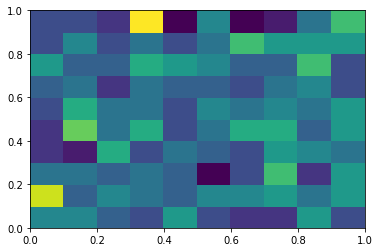

In [19]:
k = 10
samplesX = samples[::2]
samplesY = samples[1::2]

f_obs = (plt.hist2d(samplesX, samplesY, [np.linspace(0, 1, k+1), np.linspace(0, 1, k+1)])[0]).reshape(k**2,)

f_exp = np.full(k**2, len(samples) // (2*k**2))

print(f_obs) 
print(f_exp) 

stats.chisquare(f_obs, f_exp)

### Задача 2
Реализовать permutation test и применить к выборке samples. \\
Снова разобъем последовательность $x_1, x_2, x_3, ..., x_{dn}$ на последовательные серии длины d: $(x_1, ..., x_d), (x_{d+1}, x_{2d+d}), ..., (x_{nd-d}, x_{nd})$. Серия из d элементов может быть упорядочена d! способами и каждый способ упорядочивания равновероятен. Отсюда идея теста - посчитать, сколько раз каждый порядок встречается среди n серий и применить хи-квадрат тест.

In [104]:
n = 1000
d = 4                           

samples2 = samples
samples2 = np.reshape(samples2, (n//d, d))
transps = [np.argsort(samples2[i,:]) for i in range(n//d)]

unique, counts = np.unique(transps, return_counts = True, axis = 0)

f_obs = counts
f_exp = np.full(np.math.factorial(d), 1000 / (d * np.math.factorial(d)))

print(f_obs) 
print(f_exp) 

stats.chisquare(f_obs, f_exp)

[11 16 16 11  9 10  8  8  6 14 10  8  9  6 10 12 11 10  8  6 17 15 11  8]
[10.41666667 10.41666667 10.41666667 10.41666667 10.41666667 10.41666667
 10.41666667 10.41666667 10.41666667 10.41666667 10.41666667 10.41666667
 10.41666667 10.41666667 10.41666667 10.41666667 10.41666667 10.41666667
 10.41666667 10.41666667 10.41666667 10.41666667 10.41666667 10.41666667]


Power_divergenceResult(statistic=22.64, pvalue=0.48194973543642283)

###Задача 3
Привести статистический тест, который покажет, что с rng_bad есть проблемы, а с rng - нет.

In [20]:
def rng_bad(m=2**31, a=65539, c=0):
    rng_bad.current = (a * rng_bad.current + c) % m
    return rng_bad.current / m
rng_bad.current = 1

random = [rng() for _ in range(1000)]
random_bad = [rng_bad() for _ in range(30000)]

In [21]:
stats.kstest(random_bad, stats.uniform.cdf)

KstestResult(statistic=0.008437018050998446, pvalue=0.027777953265237354)

In [22]:
stats.kstest(random, stats.uniform.cdf)

KstestResult(statistic=0.029513963367789997, pvalue=0.3417453517955097)

###Задача 4
Смоделировать выборку объема 1000 из дискретного распределения на множестве цифр 0, 1, 2, ..., 9 с весами 0.12, 0.3, 0.167, 0.24, 0.31, 0.54, 0.111, 0.02, 0.001, 0.2. По выборке построить гистограмму. Оптимизируйте алгоритм, упорядочив веса.

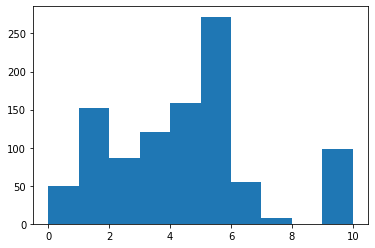

0.008780096000009507


In [33]:
import time as tm
F = np.array([0.12, 0.3, 0.167, 0.24, 0.31, 0.54, 0.111, 0.02, 0.001, 0.2])
F /= F.sum()
F = [F[:k].sum() for k in range(1, 11, 1)]
selection = np.zeros(1000)

t0 = tm.perf_counter()
for i in range(1000):
  s = np.random.rand()
  j = 0
  while(s >= F[j]):
    selection[i] += 1
    j += 1


t1 = tm.perf_counter() - t0

plt.hist(selection, range = (0,10)) 
plt.show()
print(t1)

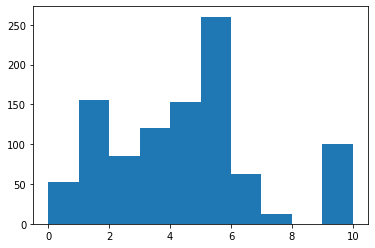

0.005782205000002705


In [34]:
F = np.array([0.12, 0.3, 0.167, 0.24, 0.31, 0.54, 0.111, 0.02, 0.001, 0.2])
F /= F.sum()
F = [F[:k].sum() for k in range(1, 11, 1)]
m = np.argsort(F)
F.sort()
selection = np.zeros(1000, dtype = int)

t0 = tm.perf_counter()
for i in range(1000):
  s = np.random.rand()
  j = 0
  while(s >= F[j]):
    selection[i] += 1
    j += 1

t2 = tm.perf_counter() - t0

plt.hist(m[selection], range = (0,10)) 
plt.show()
print(t2)

In [35]:
print("Стало в", t1/t2, "раз быстрее")

Стало в 1.51846847353309 раз быстрее


###Задача 5
Смоделируйте выборку размера 1000 из распределения  Exp(λ)  с помощью метода Inverse transform. Постройте выборочную гистограмму и точный график плотности распределения.

Функция распределения и обратная к ней: \\
$F(x) = 1 - e^{- \lambda x}$ \\
$F^{-1}(p) = \frac{- \ln ({1 - p})} {\lambda} $

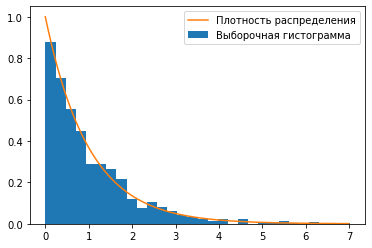

In [25]:
from math import exp
l = 1
selectionEXP = [-(np.log(1 - np.random.rand()))/l for _ in range(1000)]

plt.hist(selectionEXP, 30, density = True, label = "Выборочная гистограмма")

plt.plot(np.arange(0, 7, 0.01), l * np.exp(-l * np.arange(0, 7, 0.01)), label = "Плотность распределения")

plt.legend()
plt.show()

### Задача 6
Обоснуйте (устно), что метод accept-reject действительно производит выборку из нужного распределения. Смоделируйте 1000 точек из распределения с плотностью $e^xcos^2x$ на отрезке $[-\pi/2, \pi/2]$. По выборке постройте график выборочной гистограммы и сравните его с графиком точной функции плотности.

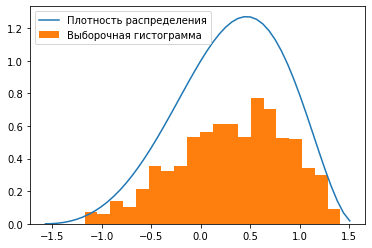

In [44]:
left, right = -np.pi/2, np.pi/2  

def d(x):
  return np.exp(x) * np.cos(x)**2

selection6 = np.zeros(1000)
selection6y = np.zeros(1000)
i = 0
while (i < 1000):
    point = np.random.rand(2)
    x = point[0]*(right - left)+left
    y = point[1]*1.3
    if (y <= d(x)):
      selection6[i] = x
      selection6y[i] = y
      i += 1


X = np.arange(-np.pi/2, np.pi/2, np.pi/50)
plt.plot(X, d(X), label = "Плотность распределения")
plt.hist(selection6, 20, density = True, label = "Выборочная гистограмма")

plt.legend()
plt.show()




### Задача 7
Смоделировать и изобразить выборку из 500 точек равномерно распределенных внутри данного треугольника без использования метода отбора. 

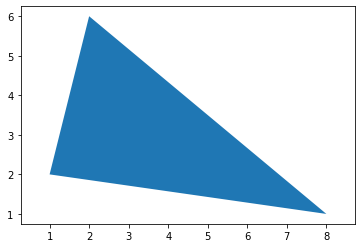

In [27]:
%matplotlib inline
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection

fig = plt.figure()
fig.patch.set_facecolor('xkcd:white')

polygon = Polygon(np.array([[1, 2], [2, 6], [8, 1]]), True)
plt.gca().add_collection(PatchCollection([polygon]))
plt.axis('equal')
plt.show()

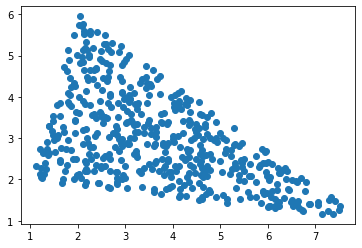

In [28]:
selection7 = np.zeros((500, 2))
A = np.array([1,2])
B = np.array([8,1])
C = np.array([2,6])
AB = B - A
AC = C - A
for i in range (500):
    point = np.random.rand(2)
    x = point[0]
    y = point[1]
    if (x+y > 1):
        x, y = 1-x, 1-y
    selection7[i] = A + x*AB + y*AC


plt.scatter (selection7[:, 0], selection7[:, 1])
plt.show()

### Задача 8
Смоделировать без использования метода отбора выборку из 500 точек равномерно распределенных внутри единичного круга. Изобразите полученные точки. Они действительно равномерно заполняют круг?

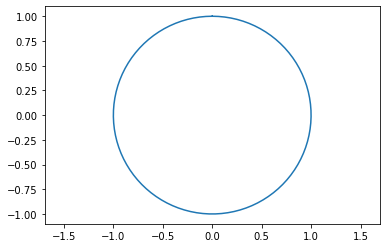

In [29]:
%matplotlib inline
fig = plt.figure()
fig.patch.set_facecolor('xkcd:white')

t = np.linspace(0, 2 * np.pi, 100)
plt.plot(np.sin(t), np.cos(t))
plt.axis('equal')
plt.show()

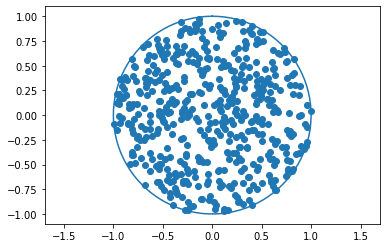

In [30]:
selection8 = np.zeros((500, 2))
theta = 0

for i in range (500):
  theta = np.random.rand() * 2 * np.pi
  r = np.random.rand() + np.random.rand()
  if r >= 1:
      r = 2 - r;
  selection8[i][0] = r * np.cos(theta)
  selection8[i][1] = r * np.sin(theta)

plt.scatter (selection8[:, 0], selection8[:, 1])
plt.plot(np.sin(t), np.cos(t))
plt.axis('equal')
plt.show()



### Задача 9
Докажите (устно), что приведенный ниже алгоритм (Box-Muller algorithm) формирует выборку из независимых N(0,1) случаных величин. Модифицируйте метод, чтобы исключить вызовы тригонометрических функций ```np.sin``` и ```np.cos```. С помощью модифицированного метода смоделируйте выборку объема 1000 из двумерного гауссовского распределения со средним [4, 7] и ковариационной матрицей [[20,  -4],
       [ -4, 40]]. Постройте 2D гистограмму полученного распределения. Сравните выборочное среднее и ковариационную матрицу с точными значениями.

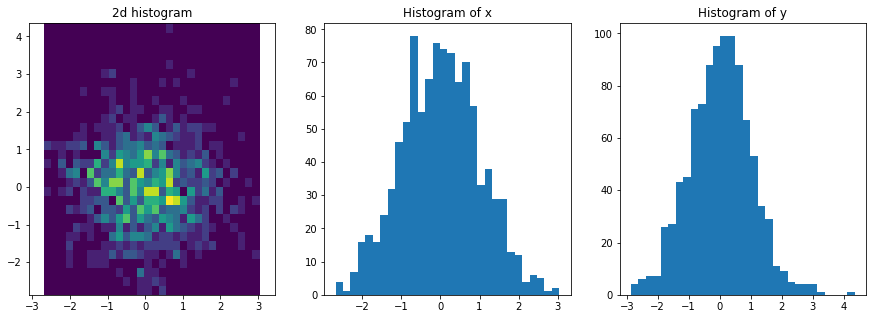

In [31]:
%matplotlib inline

n = 1000
u1, u2 = np.random.rand(2, n)
r = np.sqrt(-2 * np.log(u1))
theta = 2 * np.pi * u2
x = r * np.cos(theta)
y = r * np.sin(theta)

fig, ax = plt.subplots(1, 3, figsize=(15, 5))
fig.patch.set_facecolor('xkcd:white')
ax[0].hist2d(x, y, bins=30)
ax[0].axis('equal')
ax[1].hist(x, bins=30)
ax[2].hist(y, bins=30)
ax[0].set_title("2d histogram")
ax[1].set_title("Histogram of x")
ax[2].set_title("Histogram of y")
plt.show()

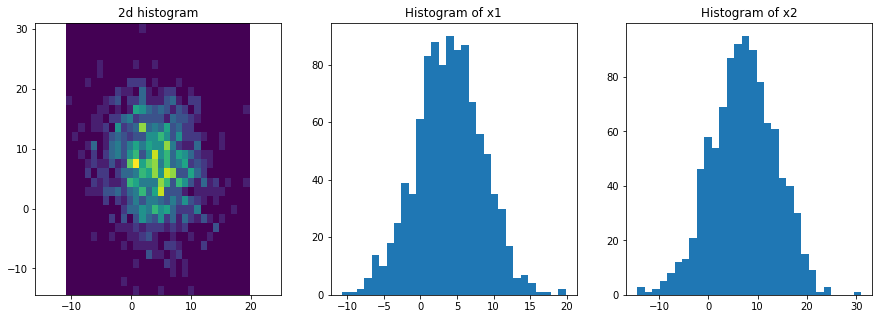

[[20.56163715 -4.38432692]
 [-4.38432692 42.58224891]]


In [65]:
%matplotlib inline

n = 1000
u1, u2 = np.random.rand(2, n) * 2 - 1
for i in range(1000):
  while u1[i]**2 + u2[i]**2 > 1:
    u1[i], u2[i] = np.random.rand(2) * 2 - 1
s = u1**2 + u2**2
x = u1 * np.sqrt(- 2 * np.log(s)/s)
y = u2 * np.sqrt(- 2 * np.log(s)/s)

x1 = (-2) * x + 4 * y + 4
x2 = x * 6 + 2 * y + 7

fig, ax = plt.subplots(1, 3, figsize=(15, 5))
fig.patch.set_facecolor('xkcd:white')
ax[0].hist2d(x1, x2, bins=30)
ax[0].axis('equal')
ax[1].hist(x1, bins=30)
ax[2].hist(x2, bins=30)
ax[0].set_title("2d histogram")
ax[1].set_title("Histogram of x1")
ax[2].set_title("Histogram of x2")
plt.show()
print(np.cov(x1, x2))